Notas!! 

-> Label encoder train and test 

-> test model annoy, FARSS, Ligthgbm ranker

-> criar Ml canvas

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import lightgbm as lgb
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder 


import lightgbm as lgb

from annoy import AnnoyIndex

In [234]:
train_df = pd.read_csv('train-v0.3.csv')

In [235]:
print("shape train data = " , train_df.shape)

shape train data =  (781744, 5)


In [236]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781744 entries, 0 to 781743
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   query_id      781744 non-null  int64 
 1   query         781744 non-null  object
 2   query_locale  781744 non-null  object
 3   product_id    781744 non-null  object
 4   esci_label    781744 non-null  object
dtypes: int64(1), object(4)
memory usage: 29.8+ MB


,query_id,query,query_locale,product_id,esci_label
0,0,# 2 pencils not sharpened,us,B0000AQO0O,exact
1,0,# 2 pencils not sharpened,us,B0002LCZV4,exact
2,0,# 2 pencils not sharpened,us,B00125Q75Y,exact
3,0,# 2 pencils not sharpened,us,B001AZ1D3C,exact
4,0,# 2 pencils not sharpened,us,B001B097KC,exact


In [237]:
train_df.isnull().sum()

query_id        0
query           0
query_locale    0
product_id      0
esci_label      0
dtype: int64

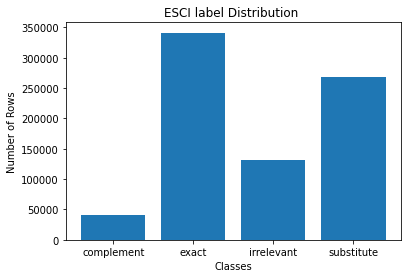

In [238]:
plt.bar(
    x = np.unique(train_df["esci_label"]),
    height = [list(train_df["esci_label"]).count(i) for i in np.unique(train_df["esci_label"])] , 
) 
plt.xlabel("Classes")
plt.ylabel("Number of Rows")
plt.title('ESCI label Distribution ')
plt.show()

### Null Values

In [242]:
X_train = train_df.drop(["esci_label", "product_id"], axis=1) 
y_train = train_df.drop(["query_id", "query", "query_locale", "product_id"], axis=1) 


y_train

,esci_label
0,exact
1,exact
2,exact
3,exact
4,exact
...,...
781739,substitute
781740,exact
781741,exact
781742,exact


In [243]:
#label encoder colluns

Labelencoder = LabelEncoder()
X_train["query_locale"] = Labelencoder.fit_transform(X_train["query_locale"])

Labelencoder_1 = LabelEncoder()
X_train["query"] = Labelencoder_1.fit_transform(X_train["query"])


X_train.info()
X_train.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781744 entries, 0 to 781743
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   query_id      781744 non-null  int64
 1   query         781744 non-null  int64
 2   query_locale  781744 non-null  int64
dtypes: int64(3)
memory usage: 17.9 MB


,query_id,query,query_locale
0,0,3,2
1,0,3,2
2,0,3,2
3,0,3,2
4,0,3,2


In [244]:
Labelencoder_y= LabelEncoder()
y_train["esci_label"] = Labelencoder_y.fit_transform(y_train["esci_label"])

y_train.to_numpy()
X_train.to_numpy()

array([[    0,     3,     2],
       [    0,     3,     2],
       [    0,     3,     2],
       ...,
       [33803, 33449,     1],
       [33803, 33449,     1],
       [33803, 33449,     1]])

Test lightgbm ranker

In [245]:
gbm = lgb.LGBMRanker()
gbm.fit(X_train, y_train)

ValueError: Should set group for ranking task